In [ ]:
# 1. Import Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# 2. Load the Dataset
df = pd.read_csv('creditcard.csv')


In [ ]:
# 3. Basic Cleaning
# Drop rows with any missing values
df.dropna(inplace=True)

# Ensure 'Class' is integer
df['Class'] = df['Class'].astype(int)



In [ ]:
# 4. Normalize the 'Amount' column
scaler = StandardScaler()
df['NormalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Drop 'Time' and original 'Amount'
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [ ]:
# 5. Split Features and Target
X = df.drop('Class', axis=1)
y = df['Class']


In [ ]:
# 6. Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# 7. Apply SMOTE to Handle Class Imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# 8. Train a Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
# Classification report
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



In [ ]:
# Classification Report
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



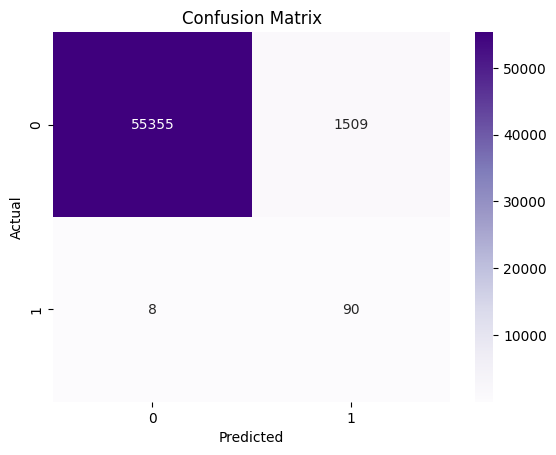

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


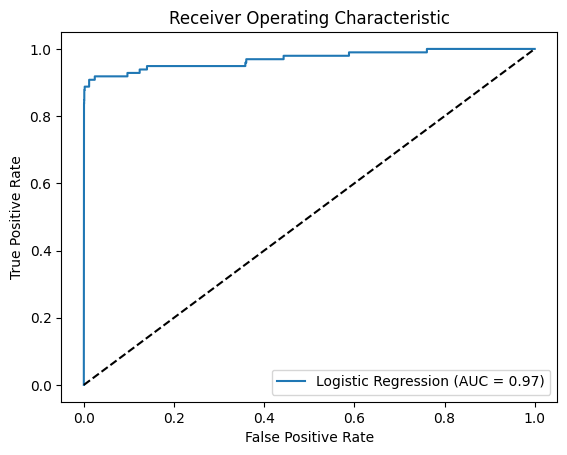

In [ ]:
# Plot ROC Curve & AUC Score
from sklearn.metrics import roc_curve, auc

y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 97.34%


In [ ]:
import joblib

# Save the model
joblib.dump(model, 'logistic_model.pkl')
print("Model saved as 'logistic_model.pkl'")


Model saved as 'logistic_model.pkl'
